In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''
from datetime import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import progressbar

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)
# вычисление производной от Relu функции
def relu_deriv(x):
    return x>0

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [40]:
def f_plot_learn(i_iter):
    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    layers_count = execution_log[i_iter][1]
    plt.figure(figsize = (16,5))
    plt.plot(errors_log[i_iter])
    plt.xlabel('Обучение №'+str(i_iter))
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 
    accuracy = (1 - errors_log[i_iter][len(errors_log[i_iter])-1]) * 100

    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    
    # прямое распространение(feed forward)
    layer_t = []
    layer_t_temp = X_test
    layer_t.append(layer_t_temp)

    # прямое распространение(feed forward)
    for j in range(1,layers_count+1):
        layer_t_temp = sigmoid(np.dot(layer_t[j-1], weight_log[i_iter][j-1]))
        layer_t.append(layer_t_temp)
    
    
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer_t[layers_count][:N,1], 'r',label = 'Y new')
    plt.plot(y_test[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера:'+str(i_iter))
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть

    # метрика модели
    error_t = np.mean(np.abs(errors_t_log[i_iter]))
    accuracy_t = (1 - error_t) * 100
    print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

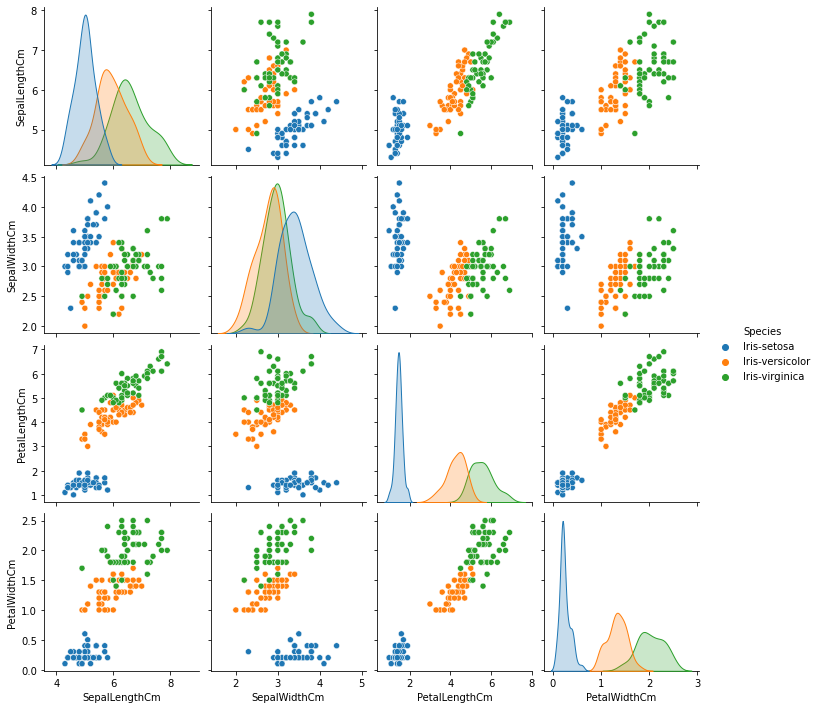

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./data/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.38)

#Собираем статистику
execution_log = []
errors_log = []
errors_t_log = []
weight_log = []

In [5]:
def traint_network(neuron_numb,layers_count,learning_rate,feeds_count):
    income_parameters = []
    income_parameters.append(neuron_numb)
    income_parameters.append(layers_count)
    income_parameters.append(learning_rate)
    income_parameters.append(feeds_count)
    ### Шаг 3. Обученние нейронной сети
    startTime = dt.now()
    # определим число нейронов скрытого слоя


    # присваевание случайных весов

    w = []
    w_temp = 2*np.random.random((4, neuron_numb)) - 1
    w.append(w_temp)
    for i in range(1,layers_count-1):
        w_temp = 2*np.random.random((neuron_numb, neuron_numb)) - 1
        w.append(w_temp)
    w_temp = 2*np.random.random((neuron_numb, 3)) - 1
    w.append(w_temp)

    # скорость обучения (learning rate)
    n = learning_rate

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(feeds_count):

        # прямое распространение(feed forward)
        layer = []
        layer_temp = X_train
        layer.append(layer_temp)
        for j in range(1,layers_count+1):
            layer_temp = sigmoid(np.dot(layer[j-1], w[j-1]))
            layer.append(layer_temp)

        
        
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer_error = []
        layer_delta = []
        
        layer_error_temp = y_train - layer[len(layer)-1]
        layer_error.append(layer_error_temp)
        layer_delta_temp = layer_error * sigmoid_deriv(layer[len(layer)-1])
        layer_delta.append(layer_delta_temp[0])
        for j in range (layers_count-1):
            layer_error.append(layer_error_temp)
            layer_delta.append(layer_delta_temp[0])

        for j in range(len(layer_error)-1,0,-1):

            layer_error[j-1] = layer_delta[j].dot(w[j].T)
            layer_delta[j-1] = layer_error[j-1] * sigmoid_deriv(layer[j])
            
        for j in range(layers_count-1,-1,-1):
            w[j] += layer[j].T.dot(layer_delta[j]) * n
            
        # метрика модели
        error = np.mean(np.abs(layer_error[layers_count-1]))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    
    endTime = dt.now() - startTime
    print("Нейроны:" + str(neuron_numb) + " Слои:" + str(layers_count) + " Ск.Обучения:" + str(learning_rate)
          + " обучение:" + str(feeds_count))
#     print(endTime)
#     print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    
    layer_t = []
    layer_t_temp = X_test
    layer_t.append(layer_t_temp)

    # прямое распространение(feed forward)
    for j in range(1,layers_count+1):
        layer_t_temp = sigmoid(np.dot(layer_t[j-1], w[j-1]))
        layer_t.append(layer_t_temp)


    layers_error_t = y_test - layer_t[layers_count]

    # метрика модели
    error_t = np.mean(np.abs(layers_error_t))
    accuracy_t = (1 - error_t) * 100
#     print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")
    income_parameters.append(endTime.seconds)
    income_parameters.append(endTime.microseconds / 1000)
    income_parameters.append(round(accuracy,2))
    income_parameters.append(round(accuracy_t,2))
    print(income_parameters)
    execution_log.append(income_parameters)
    errors_log.append(errors)
    errors_t_log.append(error_t)
    weight_log.append(w)
    

In [6]:
#traint_network(5,10,0.1,10)

In [7]:
neuron_numb = 50
layers_count = 10
learning_rate = [0.1,0.05,0.01]
feeds_count = [100,200,300,500,1000,2000,3000,10000]
#threads = []
#traint_network(neuron_numb,layers_count,learning_rate,feeds_count)

# for ii in range(neuron_numb):
#     #break
#     #result = pd.DataFrame()
#     process = Thread(target=traint_network, args=[ii,layers_count,learning_rate,feeds_count])
#     process.start()
#     threads.append(process)
# for process in threads:
#     process.join()

# Подбор параметров для нейронной сети
for i_lc in range(2,layers_count+1):
    for i_nn in range(3,neuron_numb+1):
        for i_ll in learning_rate:
            for i_fc in feeds_count:
                traint_network(i_nn,i_lc,i_ll,i_fc)

execution_log = []
errors_log = []
errors_t_log = []
weight_log = []

# Записываем полученные данные в файлы для дальнейшего анализа и обработки
with open("execution_log.pkl", 'wb') as f:
    pickle.dump(execution_log, f)
with open("errors_log.pkl", 'wb') as f:
    pickle.dump(errors_log, f)
with open("errors_t_log.pkl", 'wb') as f:
    pickle.dump(errors_t_log, f)
with open("weight_log.pkl", 'wb') as f:
    pickle.dump(weight_log, f)

In [10]:
print(execution_log)

[[3, 2, 0.1, 100, 0, 18.764, 76.33, 73.24], [3, 2, 0.1, 200, 0, 32.711, 80.27, 78.24], [3, 2, 0.1, 300, 0, 42.638, 80.67, 78.61], [3, 2, 0.1, 500, 0, 69.365, 86.05, 85.98], [3, 2, 0.1, 1000, 0, 141.427, 85.27, 86.99], [3, 2, 0.1, 2000, 0, 281.293, 78.74, 74.76], [3, 2, 0.1, 3000, 0, 419.449, 95.51, 95.84], [3, 2, 0.1, 10000, 1, 391.486, 96.62, 96.7], [3, 2, 0.05, 100, 0, 14.823, 62.77, 61.18], [3, 2, 0.05, 200, 0, 28.743, 76.83, 73.99], [3, 2, 0.05, 300, 0, 42.387, 79.82, 77.55], [3, 2, 0.05, 500, 0, 70.346, 84.19, 83.02], [3, 2, 0.05, 1000, 0, 141.421, 84.1, 82.32], [3, 2, 0.05, 2000, 0, 279.732, 78.94, 75.86], [3, 2, 0.05, 3000, 0, 421.081, 89.19, 86.1], [3, 2, 0.05, 10000, 1, 384.545, 81.97, 83.72], [3, 2, 0.01, 100, 0, 14.806, 55.97, 55.13], [3, 2, 0.01, 200, 0, 27.853, 56.8, 55.79], [3, 2, 0.01, 300, 0, 40.937, 62.51, 60.84], [3, 2, 0.01, 500, 0, 68.714, 62.14, 60.52], [3, 2, 0.01, 1000, 0, 142.301, 78.29, 75.56], [3, 2, 0.01, 2000, 0, 277.429, 81.95, 80.46], [3, 2, 0.01, 3000, 0,

1214
Нейроны:5 Слои:3 Ск.Обучения:0.05 Итерации обучения:3000


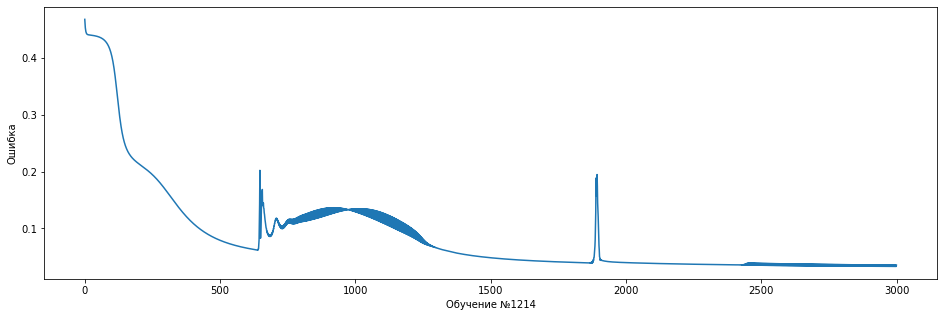

Аккуратность нейронной сети 96.49%


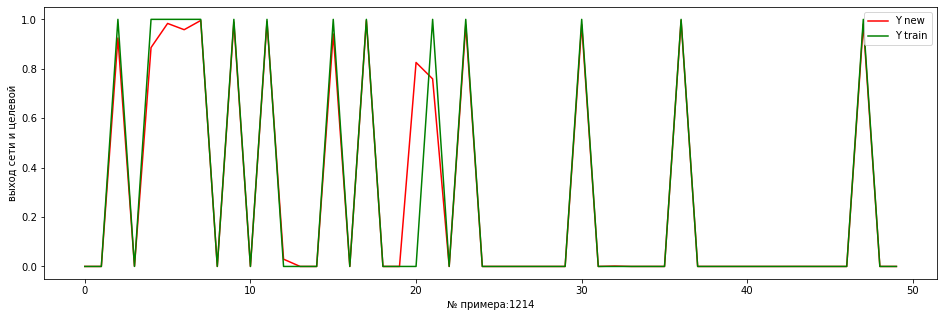

Аккуратность нейронной сети на тесте 98.06%
1470
Нейроны:16 Слои:3 Ск.Обучения:0.1 Итерации обучения:3000


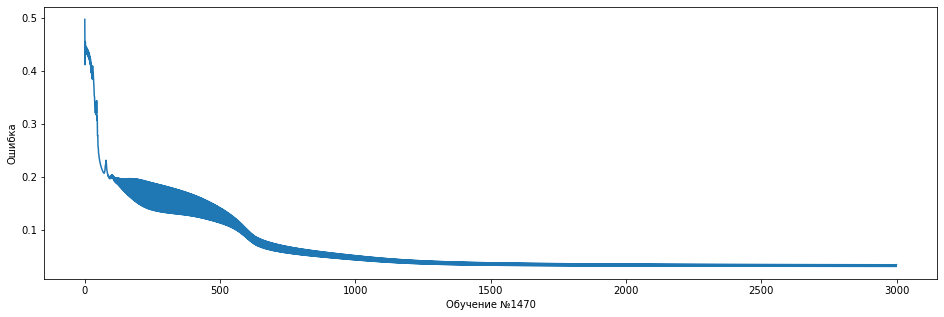

Аккуратность нейронной сети 96.52%


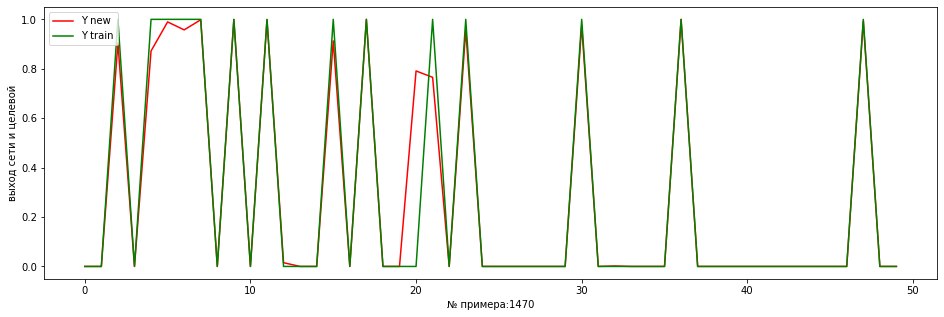

Аккуратность нейронной сети на тесте 98.17%
2581
Нейроны:14 Слои:4 Ск.Обучения:0.05 Итерации обучения:2000


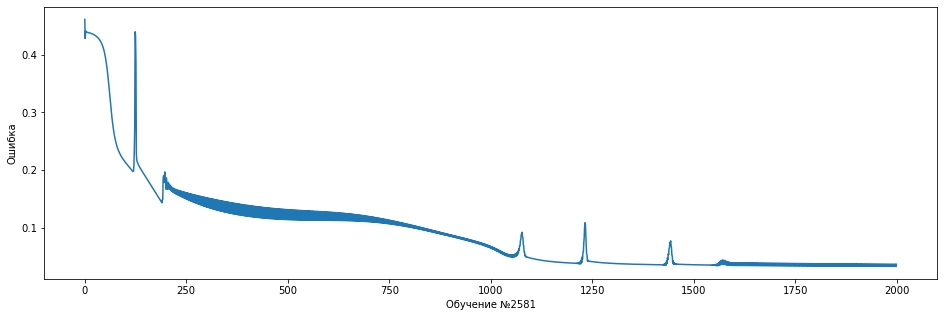

Аккуратность нейронной сети 96.35%


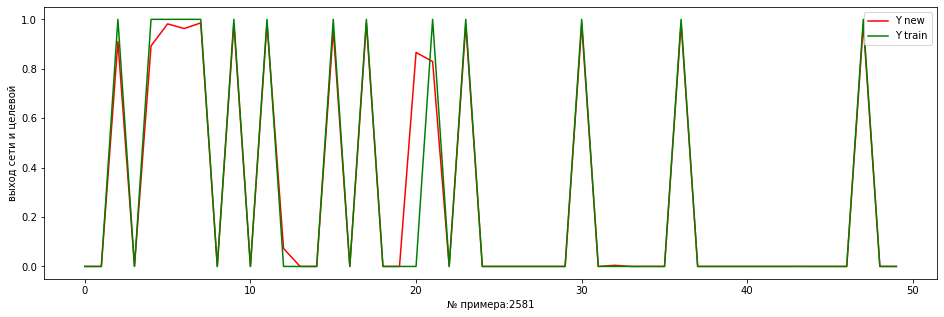

Аккуратность нейронной сети на тесте 98.0%
2693
Нейроны:19 Слои:4 Ск.Обучения:0.1 Итерации обучения:2000


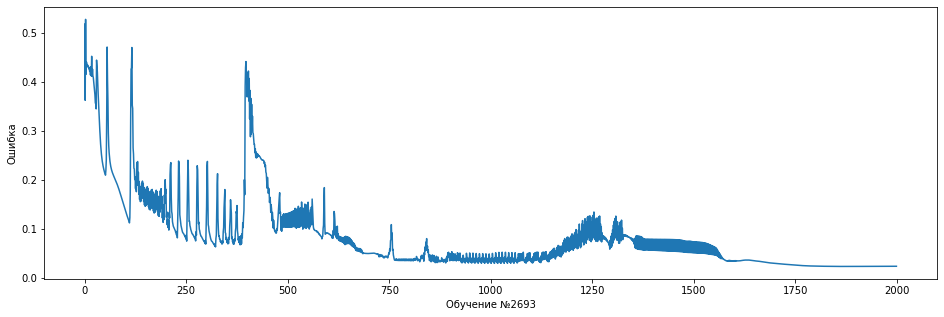

Аккуратность нейронной сети 97.68%


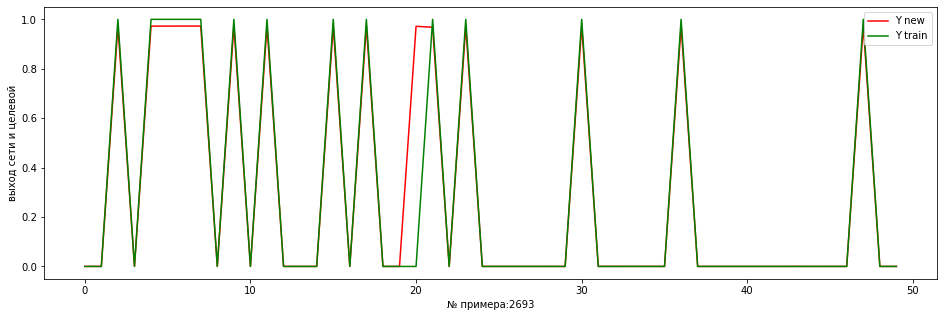

Аккуратность нейронной сети на тесте 98.26%


In [41]:
for i in range(len(execution_log)):
    if ((execution_log[i][7] >=98.00) and (execution_log[i][4]==0)) :
        print(i)
        print("Нейроны:" + str(execution_log[i][0]) + " Слои:" + str(execution_log[i][1]) 
          + " Ск.Обучения:" + str(execution_log[i][2])
          + " Итерации обучения:" + str(execution_log[i][3]))
        f_plot_learn(i)

# Выводы
В гит файды pkl добавил в исключения так как они занимают много места более 500Мб. В выводе лучшие результаты более 98% c временем обучения менее секунды.

С увеличение количества слоев увеличивается значительно время выполнения, так как для обучения сети необходима корректировка весов.

Изначальные веса также сильно влияют на результат. 

При выборе меньшего шага требуется гораздо большее количество корректировок что может увеличить время обучения модели.

Увеличение количество нейронов в каждом слое требует так-же больше итераций для корректировок весов.

Так же для каждого слоя можно выбрать свою функцию потерь что так-же может положительно сказаться на скрости обучения. 